# _`automaton`_`.proper(direction="backward", prune=True, algo="auto", lazy=False)`

Create an equivalent automaton without spontaneous transitions (i.e., transitions labeled by `\e`).

Arguments:
- `direction` whether to perform `"backward"` closure, or `"forward"` closure.
- `prune` whether to remove the states that become inaccessible (or non coaccsessible in the case of forward closure).
- `algo` the algorithm to compute the proper automaton.
- `lazy` whether performing the computation lazily, on the fly.

Preconditions:
- The automaton `is_valid`.

Postconditions:
- Result is proper.

See also:
- [Contexts](Contexts.ipynb)
- [automaton.is_proper](automaton.is_proper.ipynb)
- [automaton.is_valid](automaton.is_valid.ipynb)

References:
- [lombardy.2013.ijac](References.ipynb#lombardy.2013.ijac)

## Examples

In [1]:
import sys, vcsn

The typical use of `proper` is to remove spontaneous transitions from a Thompson automaton.

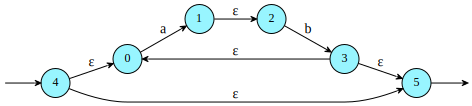

In [2]:
a = vcsn.context('lal(ab), b').expression('(ab)*').thompson(); a

In [3]:
a.context()

[ab]? -> B

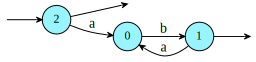

In [4]:
p = a.proper(); p

The closure can be run "forwardly" instead of "backwardly", which the default (sort of a "coproper"):

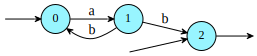

In [5]:
a.proper(direction="forward")

In [6]:
a.proper().is_equivalent(a.proper(direction="backward"))

True

### Pruning

States that _become_ inaccessible are removed.  To remove this pruning, pass `prune=False` to `proper`:

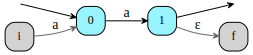

In [7]:
%%automaton a
vcsn_context = "[abc]? → 𝔹"
$ -> 0
0 -> 1 a
1 -> $
i -> 0 a
1 -> f \e

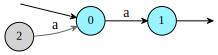

In [8]:
a.proper()

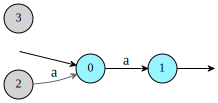

In [9]:
a.proper(prune=False)

### Weighted Automata

The implementation of proper in Vcsn is careful about the validity of the automata.  In particular, the handling on spontaneous-cycles depends on the nature of the weightset.  Some corner cases from [lombardy.2013.ijac](References.ipynb#lombardy.2013.ijac) include the following ones.

#### Automaton $\mathcal{Q}_3$ (Fig. 2) (in $\mathbb{Q}$)

The following automaton might seem well-defined.  Actually, it is not, as properly diagnosed.

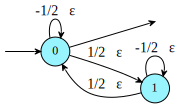

In [10]:
%%automaton -s q3
context = "lal, q"
$ -> 0
0 -> 0 <-1/2>\e
0 -> 1  <1/2>\e
1 -> 1 <-1/2>\e
1 -> 0  <1/2>\e
0 -> $

In [11]:
try:
  q3.proper()
except Exception as e:
  print("error:", e, file=sys.stderr)

error: proper: invalid automaton


In [12]:
q3.is_valid()

False

#### Automaton $\mathcal{Q}_4$ (Fig. 3) (in $\mathbb{Q}$)

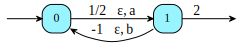

In [13]:
%%automaton q4
context = "lal, q"
$ -> 0
0 -> 1 <1/2>\e, a
1 -> 0 <-1>\e, b
1 -> $ <2>

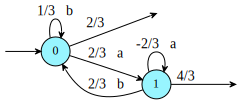

In [14]:
q4.proper()

#### A Thompson Automaton (Fig. 5)

Sadly enough, the (weighted) Thompson construction may build invalid automata from valid expressions.

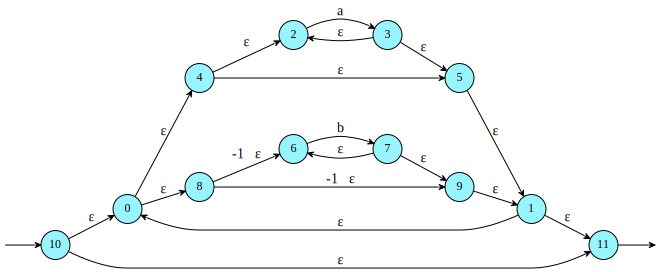

In [15]:
e = vcsn.context('lal, q').expression('(a*+<-1>b*)*')
t = e.thompson()
t

In [16]:
t.is_valid()

False

In [17]:
e.is_valid()

True

Other constructs, such as `standard`, work properly.

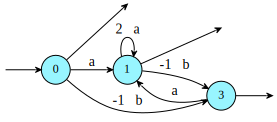

In [18]:
e.standard()

### Lazy Proper
Instead of completely eliminating the spontaneous transitions from the automaton, it is possible to delay the elimination until needed.

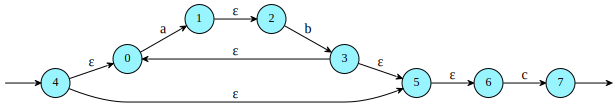

In [19]:
a = vcsn.context('lal, b').expression('(ab)*c').thompson(); a

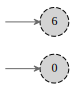

In [20]:
p = a.proper(lazy=True); p

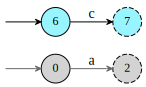

In [21]:
p('b'); p

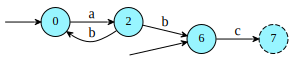

In [22]:
p('a'); p

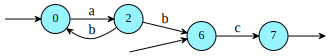

In [23]:
p('abc'); p